In [ ]:
import networkx as nx
import pandas as pd

In [ ]:
!wget "https://gist.githubusercontent.com/vicaires/2251ee806c01fe73dc2dff9fa0f20dfc/raw/1df3aca49af9a24dedbf0cbee59a2e21f9635816/stack_network_links.csv" -O 'stack_network_links.csv'

--2021-11-12 22:02:57--  https://gist.githubusercontent.com/vicaires/2251ee806c01fe73dc2dff9fa0f20dfc/raw/1df3aca49af9a24dedbf0cbee59a2e21f9635816/stack_network_links.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16489 (16K) [text/plain]
Saving to: ‘stack_network_links.csv’

stack_network_links 100%[===================>]  16.10K  --.-KB/s    in 0s      

2021-11-12 22:02:58 (61.6 MB/s) - ‘stack_network_links.csv’ saved [16489/16489]



In [ ]:
df = pd.read_csv('stack_network_links.csv')

In [ ]:
df.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [ ]:
G = nx.Graph()

In [ ]:
with open('stack_network_links.csv') as f:
  next(f)
  G = nx.parse_edgelist(f.readlines(), comments='/', delimiter=',', data=(('weight', float),))

In [ ]:
list(G.nodes())[:5]

['azure', '.net', 'sql-server', 'asp.net', 'entity-framework']

In [ ]:
list(G.edges.data('weight'))[:5]

[('azure', '.net', 20.933192346640457),
 ('azure', 'amazon-web-services', 21.30994959394633),
 ('azure', 'asp.net', 23.764072995058054),
 ('azure', 'asp.net-web-api', 21.585694763313093),
 ('azure', 'c#', 22.14448701181891)]

# Obtendo insights do grafo

## Grau ponderado

In [ ]:
weighted_degree = G.degree(weight='weight')

In [ ]:
sorted(dict(weighted_degree).items(), key=lambda node: node[1], reverse=True)[:10]

[('css', 657.9013673417929),
 ('jquery', 589.4749246032411),
 ('asp.net', 505.41979994185283),
 ('javascript', 494.4807849323973),
 ('c#', 489.8210904686912),
 ('php', 440.8106147108404),
 ('spring', 423.8320334225815),
 ('hibernate', 386.4074480863421),
 ('angularjs', 370.71172733883105),
 ('html5', 360.67260281368976)]

## Betweenness (intermediação)

In [ ]:
betweenness = nx.betweenness_centrality(G, weight='weight')

In [ ]:
sorted(betweenness.items(), key=lambda node: node[1], reverse=True)[:10]

[('linux', 0.24219841639496972),
 ('mysql', 0.1807172799254774),
 ('jquery', 0.18025151374010245),
 ('angularjs', 0.1785437043937277),
 ('apache', 0.12761993479273404),
 ('json', 0.11877037727061016),
 ('python', 0.11706256792423536),
 ('rest', 0.10821301040211147),
 ('asp.net', 0.10588417947523676),
 ('asp.net-web-api', 0.09905294208973761)]

## Eigenvector (centralidade de auto vetor)

In [ ]:
eigenvector = nx.eigenvector_centrality(G, weight='weight')

In [ ]:
sorted(eigenvector.items(), key=lambda node: node[1], reverse=True)[:10]

[('css', 0.46472970498749655),
 ('jquery', 0.3729218027234969),
 ('javascript', 0.3695722756888371),
 ('html', 0.3304239920475882),
 ('php', 0.30798320942047075),
 ('html5', 0.2878054497724675),
 ('mysql', 0.1959344417927073),
 ('sass', 0.18603359905298794),
 ('angularjs', 0.170495584324306),
 ('ajax', 0.15725291667107177)]

## Comunidades

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G, weight='weight')

In [ ]:
len(communities)

14

In [ ]:
communities

[frozenset({'ajax',
            'angularjs',
            'bootstrap',
            'codeigniter',
            'css',
            'drupal',
            'html',
            'html5',
            'ionic-framework',
            'javascript',
            'jquery',
            'json',
            'laravel',
            'less',
            'mysql',
            'photoshop',
            'php',
            'sass',
            'twitter-bootstrap',
            'twitter-bootstrap-3',
            'vue.js',
            'wordpress',
            'xml'}),
 frozenset({'.net',
            'asp.net',
            'asp.net-web-api',
            'azure',
            'c#',
            'entity-framework',
            'linq',
            'mvc',
            'oracle',
            'plsql',
            'sql',
            'sql-server',
            'unity3d',
            'vb.net',
            'visual-studio',
            'wcf',
            'wpf',
            'xamarin'}),
 frozenset({'android',
            'android-studi

# Visualizando o grafo

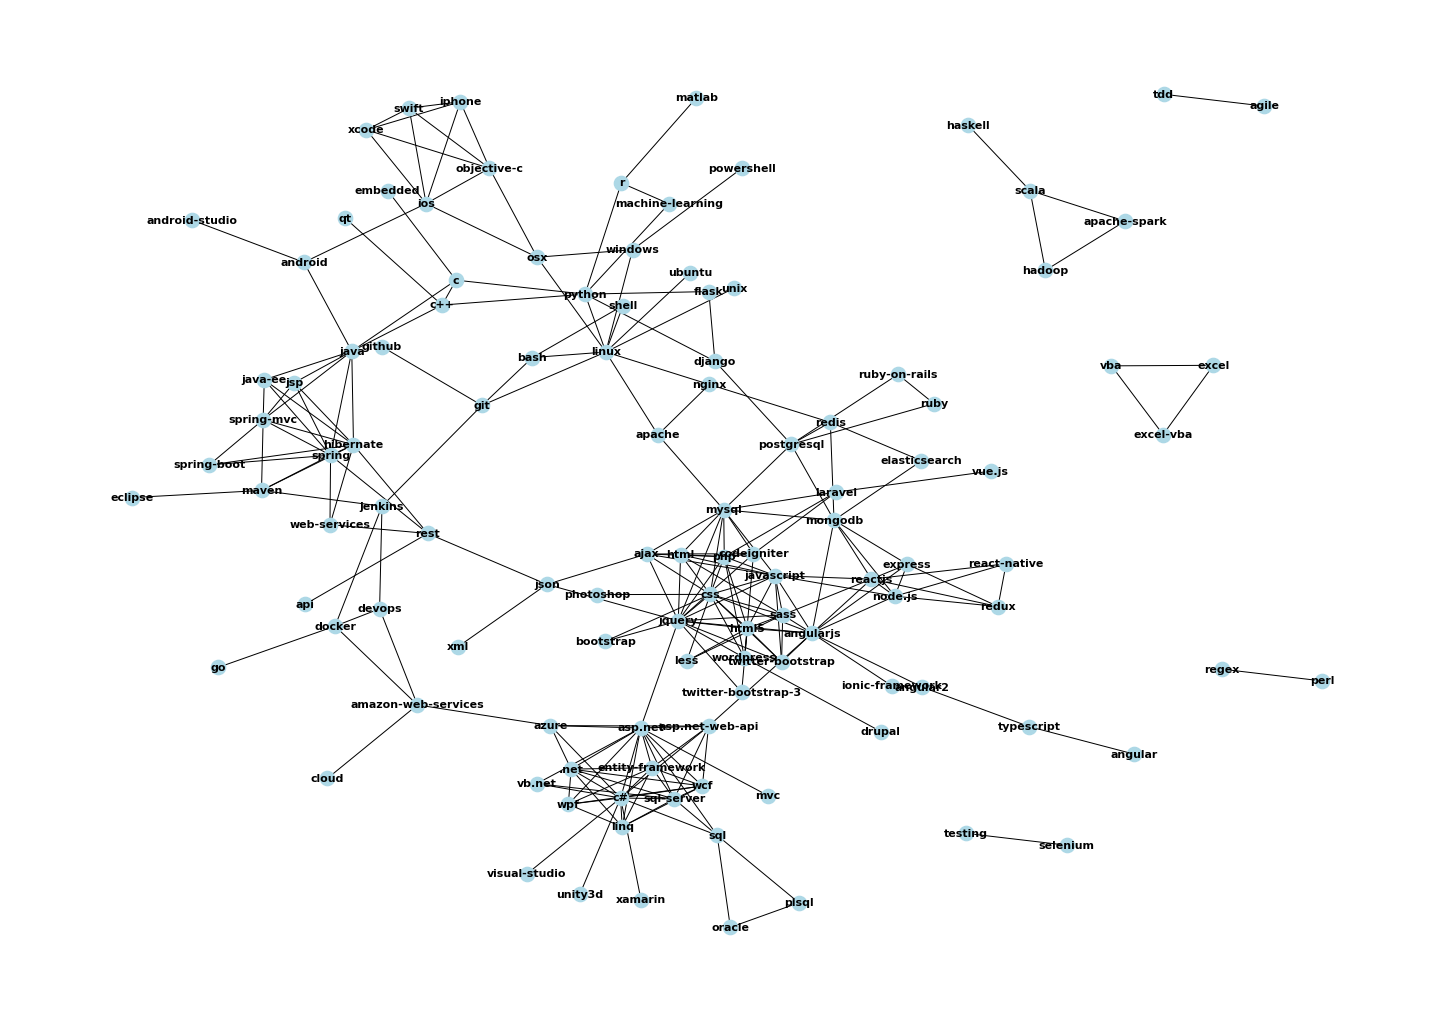

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))

nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G), \
    node_size=200, node_color='lightblue', linewidths=1.5, \
    font_size=11, font_weight='bold', with_labels=True)

# Visualizando com pyvis

## Criando atributo "group"

In [ ]:
!pip install pyvis

In [ ]:
communities_dict = {}

for i in range(len(communities)):
  for node in list(communities[i]):
    communities_dict[node] = i

nx.set_node_attributes(G, communities_dict, name='group')

In [ ]:
from pyvis.network import Network
from IPython.core.display import display, HTML

net = Network(notebook=True)
net.from_nx(G)
net.show('tags.html')
display(HTML('tags.html'))